In [136]:
import imageio.v2 as imageio
import numpy as np
import matplotlib.pyplot as plt

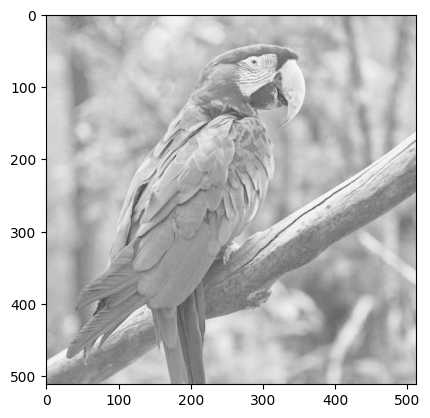

In [137]:
img = imageio.imread("imageprocessing_course_icmc/images/arara.jpg")
plt.imshow(img, cmap="gray")

In [138]:
def histogram(img, no_levels):
    h = np.zeros(no_levels).astype(int)
    
    h = [np.sum(img == level) for level in range(no_levels)]
    
    return h

<BarContainer object of 256 artists>

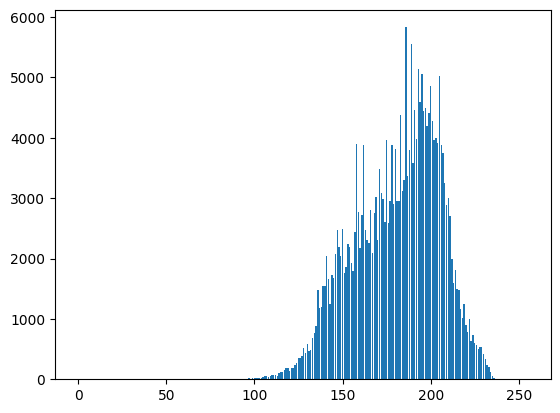

In [139]:
img_hist = histogram(img, 256)
plt.bar(range(256), img_hist)

In [140]:
def normalized_histogram(img, no_levels):
    N, M = img.shape
    
    h = np.zeros(no_levels, dtype=int)
    
    h = [np.sum(img == level) / (N * M) for level in range(no_levels)]
    
    return h

1.0


<BarContainer object of 256 artists>

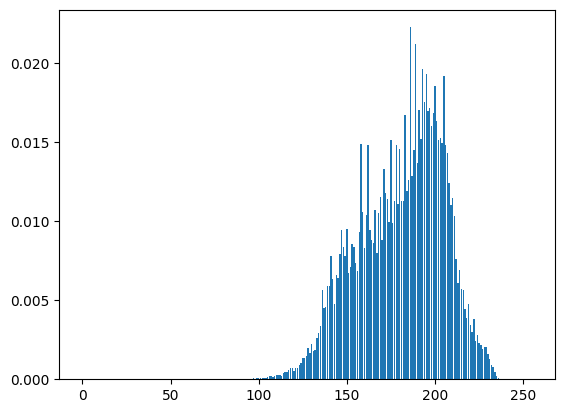

In [141]:
normalized_hist = normalized_histogram(img, 256)
print(np.sum(normalized_hist))
plt.bar(range(256), normalized_hist)

In [142]:
def cumulative_histogram(img, no_levels):
    h = np.zeros(no_levels, dtype=int)
    
    h = [np.sum(img <= level) for level in range(256)]
    
    return h

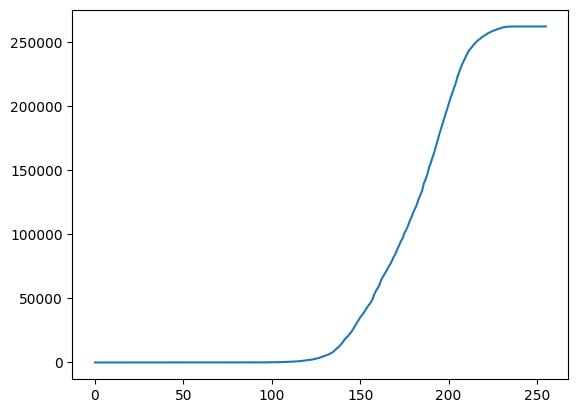

In [143]:
cumulative_hist = cumulative_histogram(img, 256)
plt.plot(range(256), cumulative_hist)

In [144]:
def cumulative_histogram_2(img, no_levels):
    h = histogram(img, no_levels)
    
    hc = np.zeros(no_levels, dtype=int)
    
    hc[0] = h[0]
    for i in range(1, no_levels):
        hc[i] = h[i] + hc[i-1]
    
    return hc

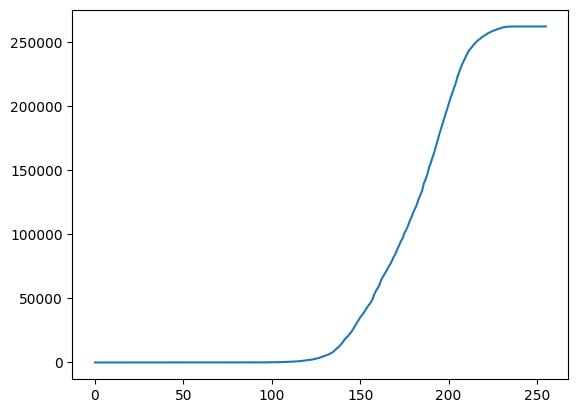

In [145]:
cumulative_hist_2 = cumulative_histogram_2(img, 256)
plt.plot(range(256), cumulative_hist_2)

In [146]:
def normalized_cumulative_histogram(img, no_levels):
    N, M = img.shape
    
    hc = np.zeros(no_levels, dtype=int)
    
    hc = [np.sum(img <= level) / (N * M) for level in range(no_levels)]
    
    return hc

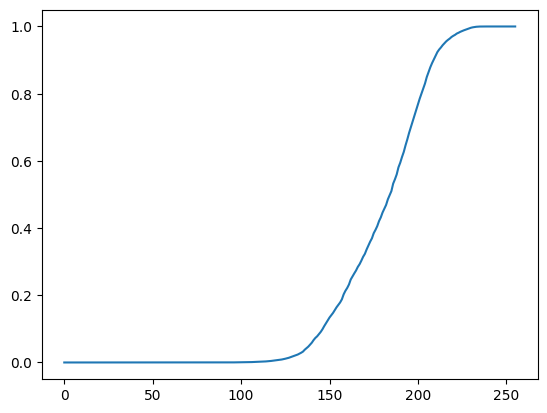

In [147]:
normalized_cumulative_hist = normalized_cumulative_histogram(img, 256)
plt.plot(range(256), normalized_cumulative_hist)

In [162]:
def histogram_equalization(img, L):
    M, N = img.shape
    
    s = np.zeros(L, dtype=int)
    
    hc = cumulative_histogram(img, L)
    
    s = [hc[z] * (L - 1) / (M * N) for z in range(L)]
    
    img_equalized = np.zeros([M, N], dtype=np.uint8)
    
    for z in range(L):
        #img_equalized[np.where(img == z)] = s[z]
        img_equalized[img == z] = s[z]
    return s, img_equalized

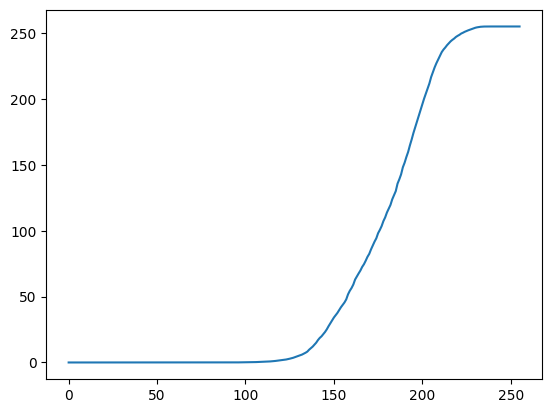

In [163]:
transfer_function, img_equalized = histogram_equalization(img, 256)
plt.plot(range(256),transfer_function)

<BarContainer object of 256 artists>

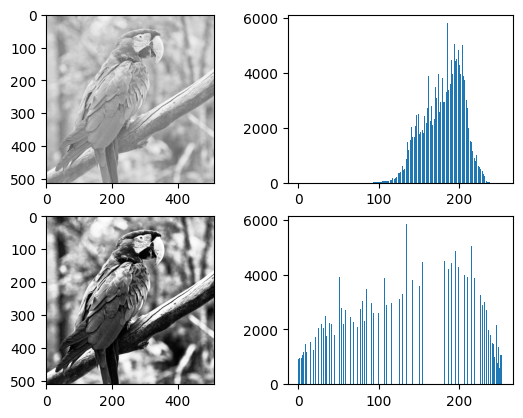

In [164]:
plt.subplot(2, 2, 1)
plt.imshow(img, cmap="gray")
plt.subplot(2, 2, 2)
plt.bar(range(256), img_hist)
plt.subplot(2, 2, 3)
plt.imshow(img_equalized, cmap="gray")
plt.subplot(2, 2, 4)
plt.bar(range(256), histogram(img_equalized, 256))

In [168]:
L = np.array([[[100,101],[110,111]],
              [[200,201],[210,211]],
              [[300,301],[310,311]],
              [[400,401],[410,411]]])
print(L)

[[[100 101]
  [110 111]]

 [[200 201]
  [210 211]]

 [[300 301]
  [310 311]]

 [[400 401]
  [410 411]]]


In [176]:
M, N = L[0].shape

H = np.zeros([2 * M, 2 * N], dtype=int)

for i in range(2 * M):
    for j in range(2 * N):
        if i % 2 == 0:
            if j % 2 == 0:
                # first image
                H[i][j] = L[0][int(np.floor(i/2))][int(np.floor(j/2))]
            else:
                # second image
                H[i][j] = L[1][int(np.floor(i/2))][int(np.floor(j/2))]
        else:
            if j % 2 == 0:
                # third image
                H[i][j] = L[2][int(np.floor(i/2))][int(np.floor(j/2))]
            else:
                # fourth image
                H[i][j] = L[3][int(np.floor(i/2))][int(np.floor(j/2))]
                
print(H)

[[100 200 101 201]
 [300 400 301 401]
 [110 210 111 211]
 [310 410 311 411]]
